In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

service = QiskitRuntimeService()

In [2]:
backend1 = service.backend("ibm_kyiv") 
target = backend1.target
basis_gates = list(target.operation_names)

In [3]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

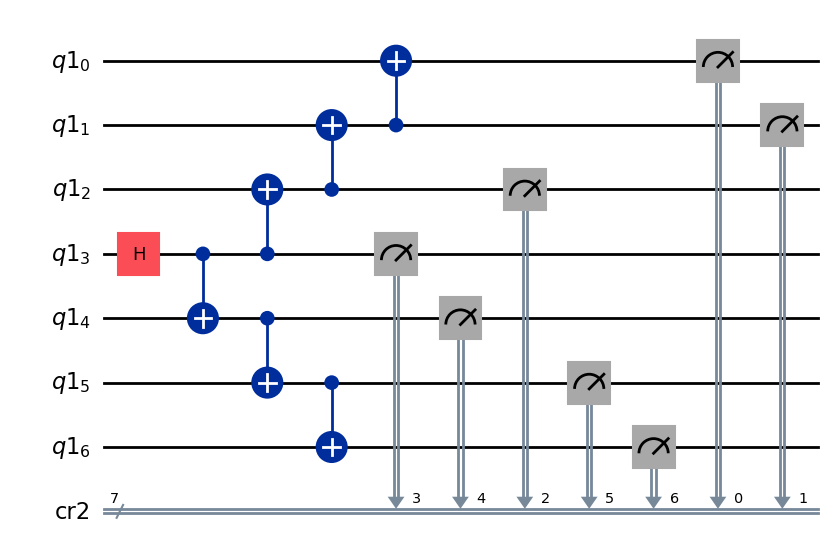

In [4]:
qc = get_ghz_circ_static(num_qubit=7)
qc.draw("mpl")

In [5]:
#dynamic circuit using qubit-reuse in aersimulator

In [6]:
def get_ghz_circ_static_1(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

In [7]:
#creating dynamic circuit from a separate static circuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static_1(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    
    return transpiled_qc

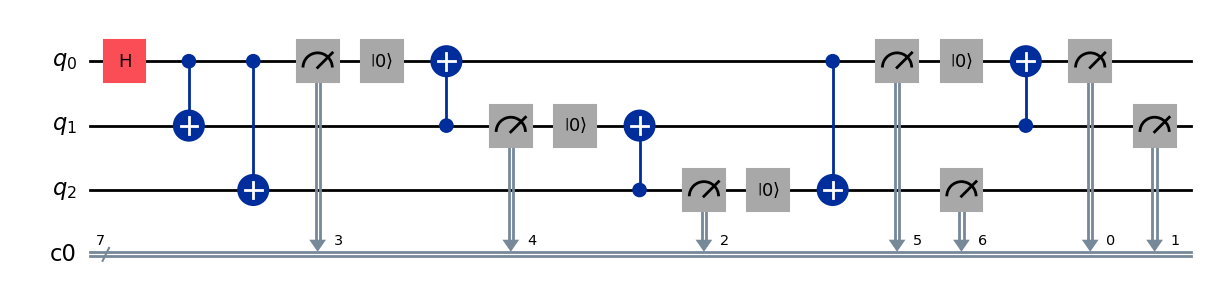

In [8]:
qc = get_ghz_circ_dynamic_2(num_qubit=7)
qc.draw("mpl")

In [9]:
#Creating list of circuits[Static_1, Dynamic1_1, Dynamic2_1, Static_1, Dynamic1_1, Dynamic2_1,...,Static_2, Dynamic1_2, Dynamic2_2, Static_2, Dynamic1_2, Dynamic2_2,...] i.e. some copies of each of them

min_qubit=17
max_num_qubit=21
copies=4

#qc_list_dynamic_1=[]
#qc_list_dynamic_2=[]
#qc_list_static=[]
#observables=[]

qc_list=[]
num_qubit_list=list(range(min_qubit,max_num_qubit+1,2))
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))
        #qc_list.append(get_ghz_circ_dynamic_1(num_qubit))
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit))
print(num_qubit_list)

[17, 19, 21]


In [10]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2,basis_gates=basis_gates)
qc_transpiled_list=[]

qc_transpiled_list_ideal = pm.run(qc_list)

In [11]:
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [12]:
print(result_ideal)
len(result_ideal)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))), PubResult(data=DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=19>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))), PubResult(data=DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=19>))), PubResult(data=DataBin(cr2=

24

In [13]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
k=0
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_ideal[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_ideal[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr2' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k+1)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_ideal.append(counts_static)
        #counts_list_ideal.append(counts_dynamic_1)
        counts_list_ideal.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=19

In [14]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

 
# Save an IBM Quantum account and set it as your default account.

 
# Load saved credentials
service = QiskitRuntimeService()
backend_name = "ibm_kyiv"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=2, backend=backend, basis_gates=basis_gates)
qc_transpiled_list = pm.run(qc_list)

In [15]:
#Executing the circuit
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)

from qiskit_ibm_runtime import Options
 
# Estimator and Sampler now have different options
options = sampler.options
 
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'
#dynamical_decoupling={'enable':True, 'sequence_type':'XpXm'}
job = sampler.run(qc_transpiled_list,shots=1024)
print(job.job_id())

cv0de6g2m8fg008c85qg


In [28]:
from qiskit_aer.noise import NoiseModel

#Accessing the noise model
noise_model = NoiseModel.from_backend(backend)

#Print the noise model
print(noise_model)

NoiseModel:
  Basis gates: ['delay', 'ecr', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']
  Instructions with noise: ['id', 'reset', 'ecr', 'x', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), 

In [29]:
# Get the properties
properties = backend.properties()

#Print the properties
print(properties)

In [30]:
# Backend general information
backend_name = properties.backend_name
backend_version = properties.backend_version
backend_last_update = properties.last_update_date
print(f"Backend Name: {backend_name}, Backend Version: {backend_version}, Last Update Date: {backend_last_update}")

Backend Name: ibm_kyiv, Backend Version: 1.20.12, Last Update Date: 2024-08-17 20:57:09+05:30


In [31]:
# Dictionary to hold qubit properties
qubit_properties = {}
# Extract qubit-specific properties
for qubit in range(len(properties.qubits)):
    qubit_data = {}
    print(f"Qubit {qubit}:")
    for item in properties.qubits[qubit]:
        # T1 time
        if item.name == 'T1':
            qubit_data['T1 (us)'] = item.value
            print(f"  T1 (us): {item.value}")
        # T2 time
        if item.name == 'T2':
            qubit_data['T2 (us)'] = item.value
            print(f"  T2 (us): {item.value}")
        # Frequency
        if item.name == 'frequency':
            qubit_data['Frequency (GHz)'] = item.value
            print(f"  Frequency (GHz): {item.value}")
        # Anharmonicity
        if item.name == 'anharmonicity':
            qubit_data['Anharmonicity (GHz)'] = item.value
            print(f"  Anharmonicity (GHz): {item.value}")
        # Readout error
        if item.name == 'readout_error':
            qubit_data['Readout error'] = item.value
            print(f"  Readout error : {item.value}")
        # Prob meas0 prep1
        if item.name == 'prob_meas0_prep1':
            qubit_data['Prob meas0 prep1'] = item.value
            print(f"  Prob meas0 prep1 : {item.value}")
        # Prob meas1 prep0
        if item.name == 'prob_meas1_prep0':
            qubit_data['Prob meas1 prep0'] = item.value
            print(f"  Prob meas1 prep0 : {item.value}")
        # Readout length
        if item.name == 'readout_length':
            qubit_data['Readout length (ns)'] = item.value
            print(f"  Readout length (ns): {item.value}")
    qubit_properties[f"Qubit {qubit}"] = qubit_data

Qubit 0:
  T1 (us): 316.0028257739093
  T2 (us): 273.1761079941465
  Frequency (GHz): 4.65562953965245
  Anharmonicity (GHz): 0
  Readout error : 0.006599999999999939
  Prob meas0 prep1 : 0.010199999999999987
  Prob meas1 prep0 : 0.003
  Readout length (ns): 1244.4444444444443
Qubit 1:
  T1 (us): 370.749806301797
  T2 (us): 187.68797174568144
  Frequency (GHz): 4.534966652959398
  Anharmonicity (GHz): 0
  Readout error : 0.0014000000000000679
  Prob meas0 prep1 : 0.0020000000000000018
  Prob meas1 prep0 : 0.0008
  Readout length (ns): 1244.4444444444443
Qubit 2:
  T1 (us): 208.61570127037592
  T2 (us): 105.42773202155422
  Frequency (GHz): 4.680122135665212
  Anharmonicity (GHz): 0
  Readout error : 0.015700000000000047
  Prob meas0 prep1 : 0.025599999999999956
  Prob meas1 prep0 : 0.0058
  Readout length (ns): 1244.4444444444443
Qubit 3:
  T1 (us): 422.121720632177
  T2 (us): 173.65774402774113
  Frequency (GHz): 4.606654472912884
  Anharmonicity (GHz): 0
  Readout error : 0.009900000

In [32]:
# Dictionary to hold single-qubit gate properties
single_qubit_gate_properties = {}
# Extract single-qubit gate-specific properties
for qubit in range(len(properties.qubits)):
    qubit_data = {}
    print(f"Qubit {qubit}:")
    # Check for gate times and errors
    for gate in properties.gates:
        if gate.qubits == [qubit]:
            gate_data = {}
            for param in gate.parameters:
                if param.name == 'gate_error':
                    gate_data['Gate error'] = param.value
                    print(f"  Gate error ({gate.gate}): {param.value}")
                if param.name == 'gate_length':
                    gate_data['Gate time (ns)'] = param.value
                    print(f"  Gate time ({gate.gate}) : {param.value} ns")
            if gate_data:
                qubit_data[gate.gate] = gate_data
    single_qubit_gate_properties[f"Qubit {qubit}"] = qubit_data
    print()

Qubit 0:
  Gate error (id): 0.0006296320528999011
  Gate time (id) : 49.77777777777777 ns
  Gate error (rz): 0
  Gate time (rz) : 0 ns
  Gate error (sx): 0.0006296320528999011
  Gate time (sx) : 49.77777777777777 ns
  Gate error (x): 0.0006296320528999011
  Gate time (x) : 49.77777777777777 ns
  Gate time (reset) : 1294.2222222222222 ns

Qubit 1:
  Gate error (id): 0.00012382631436046962
  Gate time (id) : 49.77777777777777 ns
  Gate error (rz): 0
  Gate time (rz) : 0 ns
  Gate error (sx): 0.00012382631436046962
  Gate time (sx) : 49.77777777777777 ns
  Gate error (x): 0.00012382631436046962
  Gate time (x) : 49.77777777777777 ns
  Gate time (reset) : 1294.2222222222222 ns

Qubit 2:
  Gate error (id): 0.00020905924768497284
  Gate time (id) : 49.77777777777777 ns
  Gate error (rz): 0
  Gate time (rz) : 0 ns
  Gate error (sx): 0.00020905924768497284
  Gate time (sx) : 49.77777777777777 ns
  Gate error (x): 0.00020905924768497284
  Gate time (x) : 49.77777777777777 ns
  Gate time (reset)

In [33]:
# Dictionary to hold multi-qubit gate properties
multi_qubit_gate_properties = {}
# Extract multi-qubit gate-specific properties(ECR)
for gate in properties.gates:
    if len(gate.qubits) > 1:
        gate_data = {}
        print(f"Gate {gate.gate} between qubits {gate.qubits}:")
        for param in gate.parameters:
            if param.name == 'gate_error':
                gate_data['Gate error'] = param.value
                print(f"  Gate error: {param.value}")
            if param.name == 'gate_length':
                gate_data['Gate time (ns)'] = param.value
                print(f"  Gate time : {param.value} ns")
        # Store the data in a dictionary with the gate name and qubits as keys
        gate_name = f"{gate.gate} between qubits {gate.qubits}"
        multi_qubit_gate_properties[gate_name] = gate_data
        print()

Gate ecr between qubits [0, 1]:
  Gate error: 0.005689964519186408
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [4, 3]:
  Gate error: 0.007331330812629877
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [7, 8]:
  Gate error: 0.006222611852173959
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [10, 11]:
  Gate error: 0.02504555696134056
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [17, 12]:
  Gate error: 0.013594697031632103
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [19, 18]:
  Gate error: 0.011353144216248084
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [22, 23]:
  Gate error: 0.00835272512576074
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [24, 25]:
  Gate error: 0.008482442850591854
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [26, 16]:
  Gate error: 0.008130150804880498
  Gate time : 561.7777777777777 ns

Gate ecr between qubits [28, 27]:
  Gate error: 0.0121803151396

In [34]:
#Post-processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'cv0de6g2m8fg008c85qg' #kyiv

service = QiskitRuntimeService()
job = service.job(job_id)
result_real = job.result()

In [35]:
print(result_real)
len(result_real)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_

24

In [36]:
#Finding the metrics of the job
result_metric_real=job.metrics()
print(result_metric_real)

{'timestamps': {'created': '2024-08-17T17:00:11.093712Z', 'finished': '2024-08-17T17:02:28.963Z', 'running': '2024-08-17T17:00:12.832Z'}, 'bss': {'seconds': 115}, 'usage': {'quantum_seconds': 115, 'seconds': 115}, 'executions': 24576, 'num_circuits': 24, 'num_qubits': [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], 'circuit_depths': [75, 339, 75, 339, 70, 339, 69, 339, 76, 385, 70, 385, 76, 385, 74, 385, 71, 431, 79, 431, 81, 431, 71, 431], 'qiskit_version': 'qiskit_ibm_runtime-0.23.0,qiskit-1.1.0*,qiskit_aer-0.13.3*,qiskit_experiments-0.7.0', 'estimated_start_time': '2024-08-17T17:00:12.005Z', 'estimated_completion_time': '2024-08-17T17:02:06.477Z', 'caller': 'qiskit_ibm_runtime~sampler.py'}


In [37]:
# For getting list of real counts of IBM kyiv (argument required for Fidelity)
counts_list_real=[]
k=0
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_real[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_real[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr3' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k+1)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_real.append(counts_static)
        #counts_list_real.append(counts_dynamic_1)
        counts_list_real.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=19>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=19

In [38]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_kyiv
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_kyiv=[]
#Fidelity_mean_dynamic_1_kyiv=[]
Fidelity_mean_dynamic_2_kyiv=[]

Fidelity_std_static_kyiv=[]
#Fidelity_std_dynamic_1_kyiv=[]
Fidelity_std_dynamic_2_kyiv=[]

Fidelity_copies_static_kyiv=[]
#Fidelity_copies_dynamic_1_kyiv=[]
Fidelity_copies_dynamic_2_kyiv=[]

for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
        Fidelity_static= hellinger_fidelity(counts_list_ideal[(2*i*copies)+(2*j)], counts_list_real[(2*i*copies)+(2*j)])
        #Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(3*i*copies)+((3*j)+1)], counts_list_real[(3*i*copies)+((3*j)+1)])
        Fidelity_dynamic_2=hellinger_fidelity(counts_list_ideal[(2*i*copies)+((2*j)+1)], counts_list_real[(2*i*copies)+((2*j)+1)])
        
        Fidelity_copies_static_kyiv.append(Fidelity_static)
        #Fidelity_copies_dynamic_1_kyiv.append(Fidelity_dynamic_1)
        Fidelity_copies_dynamic_2_kyiv.append(Fidelity_dynamic_2)

    
    Fidelity_mean_static_kyiv.append(statistics.mean(Fidelity_copies_static_kyiv))
    #Fidelity_mean_dynamic_1_kyiv.append(statistics.mean(Fidelity_copies_dynamic_1_kyiv))
    Fidelity_mean_dynamic_2_kyiv.append(statistics.mean(Fidelity_copies_dynamic_2_kyiv))
    
    Fidelity_std_static_kyiv.append(statistics.stdev(Fidelity_copies_static_kyiv))
    #Fidelity_std_dynamic_1_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_1_kyiv))
    Fidelity_std_dynamic_2_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_2_kyiv))
    
    Fidelity_copies_static_kyiv.clear()
    #Fidelity_copies_dynamic_1_kyiv.clear()
    Fidelity_copies_dynamic_2_kyiv.clear()

[0.5113310820180703, 0.40496459864552686, 0.2935544506071338]
[0.5745959077643613, 0.5121515832842587, 0.47454092761298816]
[0.01634352196664886, 0.10320902825337691, 0.12333922464847165]
[0.024455848658312927, 0.020829737574772907, 0.030891742171842682]


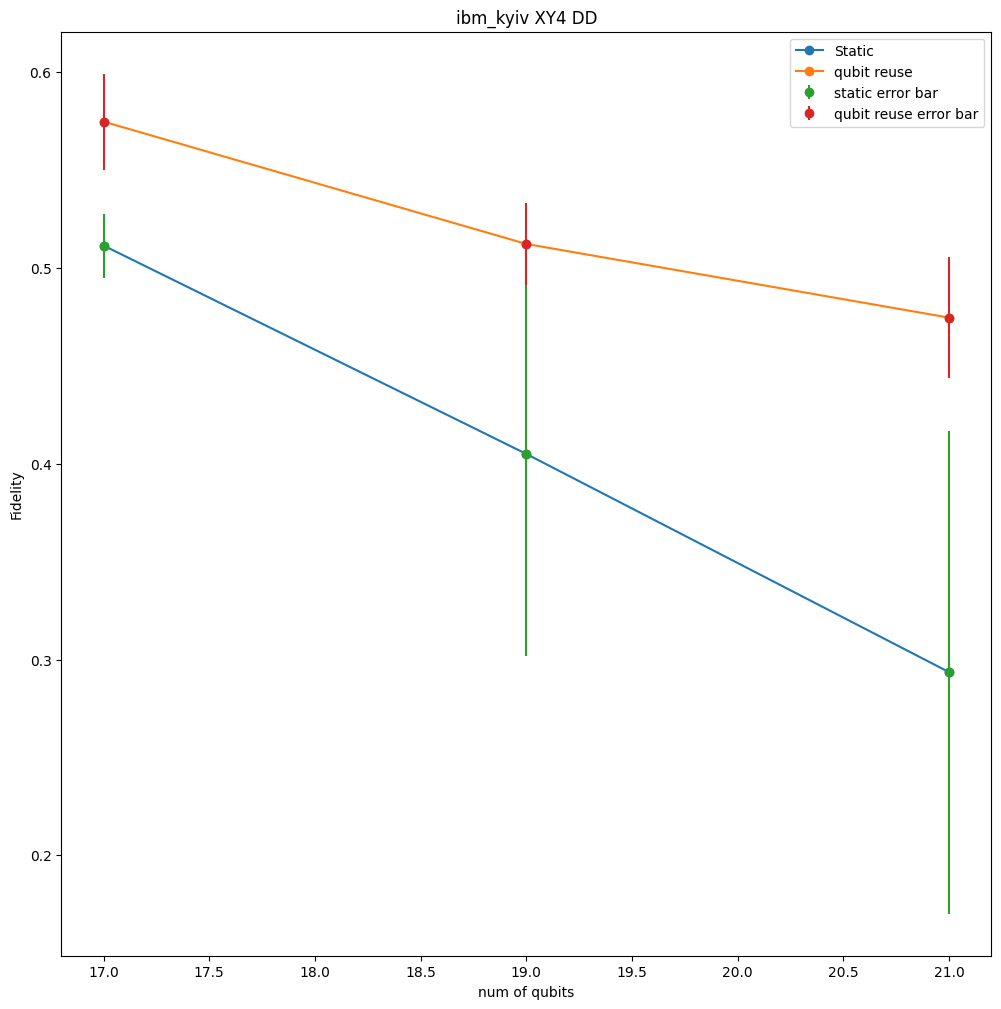

In [39]:
# Graph plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

# Create  data.
ax1.set_xlabel('num of qubits')
ax1.set_ylabel('Fidelity')
ax1.set_title('ibm_kyiv XY4 DD')

x1 = num_qubit_list
y1_static = Fidelity_mean_static_kyiv
#y1_dynamic_1 = Fidelity_mean_dynamic_1_kyiv
y1_dynamic_2 = Fidelity_mean_dynamic_2_kyiv
print(y1_static)
#print(y1_dynamic_1)
print(y1_dynamic_2)

y_error_static =Fidelity_std_static_kyiv
#y_error_dynamic_1 =Fidelity_std_dynamic_1_kyiv
y_error_dynamic_2 =Fidelity_std_dynamic_2_kyiv
print(y_error_static)
#print(y1_dynamic_1)
print(y_error_dynamic_2)

ax1.plot(x1, y1_static, 'o-',label='Static')
#ax1.plot(x1, y1_dynamic_1, 'o-',label='dynamic_1')
ax1.plot(x1, y1_dynamic_2, 'o-',label='qubit reuse')
ax1.errorbar(x1, y1_static,
			yerr = y_error_static, label='static error bar',
			fmt ='o')
#ax1.errorbar(x1, y1_dynamic_1,
			#yerr = y_error_dynamic_1, label='dynamic_1',
			#fmt ='o')
ax1.errorbar(x1, y1_dynamic_2,
			yerr = y_error_dynamic_2, label='qubit reuse error bar',
			fmt ='o')


plt.legend()
plt.show()

In [47]:
import json
import qiskit.qasm3
import base64

#Static and plugin modified circuit
qc = get_ghz_circ_static(num_qubit=7)
qc1 = get_ghz_circ_dynamic_2(num_qubit=7)

# Convert plot image to Base64
with open("ghz_graph_1.png", "rb") as f:
    plot_data = base64.b64encode(f.read()).decode('utf-8')

data = {
    "Hardware_name:": backend_name,
    "Hardware version:": backend_version,
    "Hardware last updated:": backend_last_update.isoformat(),
    "Noise model:": {
        "Qubit specific properties:": qubit_properties,
        "Single-qubit gate specific properties:": single_qubit_gate_properties,
        "Multi-qubit gate specific properties:":  multi_qubit_gate_properties
    },
    "Static circuit:": qiskit.qasm3.dumps(qc),
    "Plugin modified circuit:": qiskit.qasm3.dumps(qc1),
    "Qubit number list:": num_qubit_list,
    "Total copies:": copies,
    "Ideal simulator results:": counts_list_ideal,
    "Job Id:": job.job_id(),
    "Job metrics": result_metric_real,
    "DD pulse:": "XY4",
    "Real hardware results:": counts_list_real,
    "Mean plots static circuit:": y1_static,
    "Mean plots plugin modified circuit:": y1_dynamic_2,
    "Error plots static circuit:": y_error_static,
    "Error plots plugin modified circuit:": y_error_dynamic_2,
    "plot": plot_data
}



with open("ghz_test_2.json", "w") as f:
    json.dump(data, f, indent=4)